# Data Mining, Machine Learning and Deep Learning

## Logistic Regresion 

### Mandatory Assignment 4 => Challenger Space Shuttle Accident

#### By Alin Cristian Preda

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [220]:
f = pd.read_table(r"C:\Users\aleen\Desktop\Data Science\Data Mining, Machine Learning, Deep Learning\Assignments\MA 04\o-ring-erosion-or-blowby.data", delim_whitespace=True, header=None)

In [221]:
df = pd.DataFrame(f)
column_names = ["no_rings","no_thermal_distress", "launch_temperature", "leak_check_pressure", "order_of_flight"]
df.columns=column_names
print(df.shape)
df.head(3)

(23, 5)


,no_rings,no_thermal_distress,launch_temperature,leak_check_pressure,order_of_flight
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3


In [222]:
df = df[df.columns.difference(["order_of_flight","no_rings"])]
df.head(3)

,launch_temperature,leak_check_pressure,no_thermal_distress
0,66,50,0
1,70,50,1
2,69,50,0


### 1) Temperature vs Damaged O-Rings Relationship

#### 1. Examine these data and describe whether there exists a relationship between temperatures and
damaged O-rings. Is the temperature associated with O-ring incidents? If there exists a relationship between temperatures and damaged O-rings, in which way was the temperature affecting the
probability of O-ring incidents?


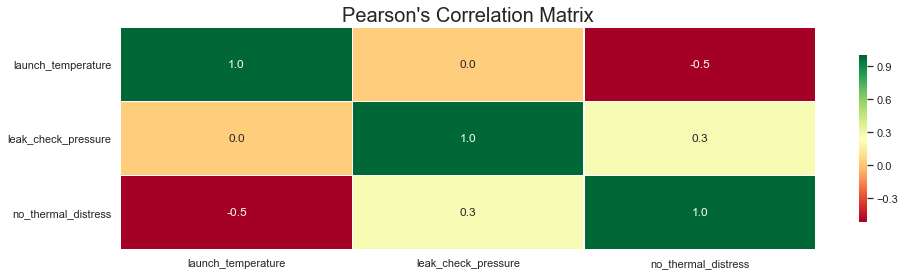

In [86]:
#correlation map to see correlation between variables
f,ax = plt.subplots(figsize=(14, 4))
plt.title("Pearson's Correlation Matrix", fontsize=20)
sns.heatmap(df.corr(), annot=True, linewidths=.25, fmt= '.1f', ax=ax, vmax=1.0, cbar_kws={"shrink": .75}, cmap="RdYlGn")
f.tight_layout()

The variable no_thermal_distress is negatively correlated to launch_temperature. The correlation seems to be moderate, at -0.5. Simply put, this describes the following effect: the rise in launch temperature has a moderately negative effect on the number of damaged o-rings. In other words, hotter temperatures mean less damaged o-rings, which in turn means that lower temperatures are associated with more damaged o-rings.

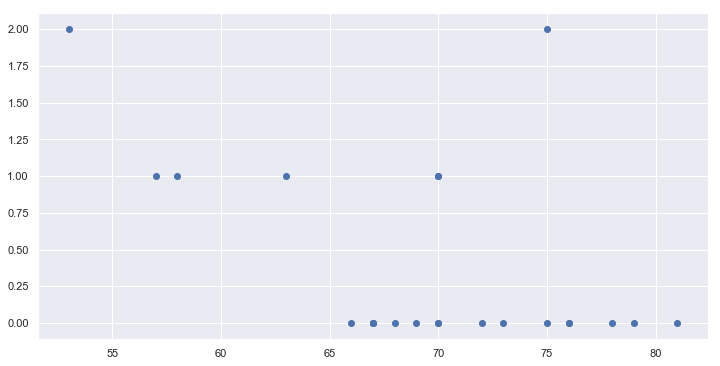

In [88]:
# Creating the scatterplot
plt.figure(figsize=(12,6))
x = df["launch_temperature"]
y = df["no_thermal_distress"]
plt.scatter(x,y)
plt.show()

Unfortunately there is no linear relationship between the variables. Thus, the correlation coefficiet is not to be trusted. Also, using a linear regression model would prove less than useful in this case.

In [223]:
df['status'] = np.where(df["no_thermal_distress"] > 0, 1, 0)
df.head(3)

,launch_temperature,leak_check_pressure,no_thermal_distress,status
0,66,50,0,0
1,70,50,1,1
2,69,50,0,0


In [224]:
total_num_failures = sum(df["status"])
print(total_num_failures)
avg_temperature = np.mean(df["launch_temperature"])
print(avg_temperature) 

7
69.56521739130434


In [226]:
# Subsetting data 
failures = df.loc[(df["status"] == 1)]
undamaged = df.loc[(df["status"] == 0)]

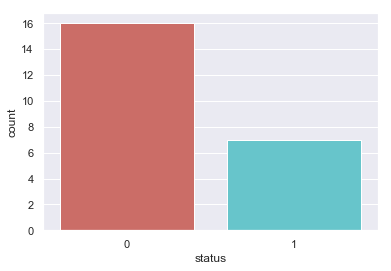

In [112]:
sns.countplot(x="status", data=df, palette="hls")

In [113]:
df.groupby("status").mean()

,launch_temperature,leak_check_pressure,no_thermal_distress
status,,,
0,72.125000,140.625000,0.000000
1,63.714286,178.571429,1.285714


The average temperature for failures is lower. The leak check pressure is higher.

### Logistic Binary Regression

#### 2. Build a Logistic Regression model fitting to the data by encoding failures as 1 for a damaged O-ring
and 0 for an undamaged O-ring. Describe the key components of your model suffiently

In [228]:
#splitting data to X ve y
X = df.drop(["status"], axis=1) # Features
y = df['status'] # Classifier

In [229]:
from imblearn.over_sampling import SMOTE
# oversample the minority class
smote = SMOTE(sampling_strategy = 'minority', random_state = 0)
X,y = smote.fit_resample(X, y)
# Let's check the results.
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 16]
 [ 1 16]]


In [230]:
#splitting data to X ve y
X = df["launch_temperature"] # Features
#X = df.drop(["status"],axis=1)
y = df['status'] # Classifier

In [231]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.592665
         Iterations 4
                          Results: Logit
Model:                Logit             Pseudo R-squared:  0.036  
Dependent Variable:   status            AIC:               29.2626
Date:                 2019-04-07 00:15  BIC:               30.3981
No. Observations:     23                Log-Likelihood:    -13.631
Df Model:             0                 LL-Null:           -14.134
Df Residuals:         22                LLR p-value:       nan    
Converged:            1.0000            Scale:             1.0000 
No. Iterations:       4.0000                                      
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
launch_temperature -0.0136   0.0067 -2.0326 0.0421 -0.0266 -0.0005



P value lower than 0.05 suggests X is significant. The coefficient -0.0136 suggests that the probability of the o-ring failing drops by 13.6% with each 1 degree of increased temperature.

#### 3. Using the Logistic Regression model model you have built, compute the predicted probability that
an O-ring will become damaged for the temperature (31 oF) on the launch day?


In [179]:
result.predict(31)

array([0.39644522])

According to my model, there was a chance of almost 40% that the o-rings would have suffered damage on the launch day, which is very high, especially given the nature of the situation. 

#### 4. Similarly compute the predicted probabilities that an O-ring will become damaged for the temperatures ranging from 30 oF to 80 oF and display them using a plot.


In [232]:
temp_range = np.arange(30,81,1)
results = {}
print(len(temp_range))
for t in temp_range:
    results[t] = float(result.predict(t))

51


<function matplotlib.pyplot.show(*args, **kw)>

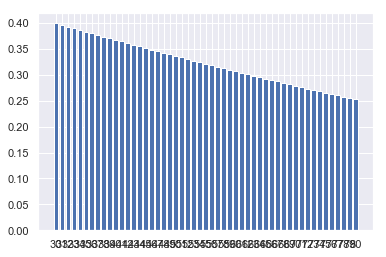

In [233]:
plt.bar(range(len(results)), list(results.values()), align='center')
plt.xticks(range(len(results)), list(results.keys()))
plt.show

As can be seen from the plot, the probability that an O-ring will be damaged decreases along with the rising temperature, as was suggested at point 1). 